In [1]:
from src.load_data import load_annotation_data


In [2]:
df = load_annotation_data()


✅ Loaded 313.


In [3]:
import scipy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
n_clusters = 25 # Set the number of clusters

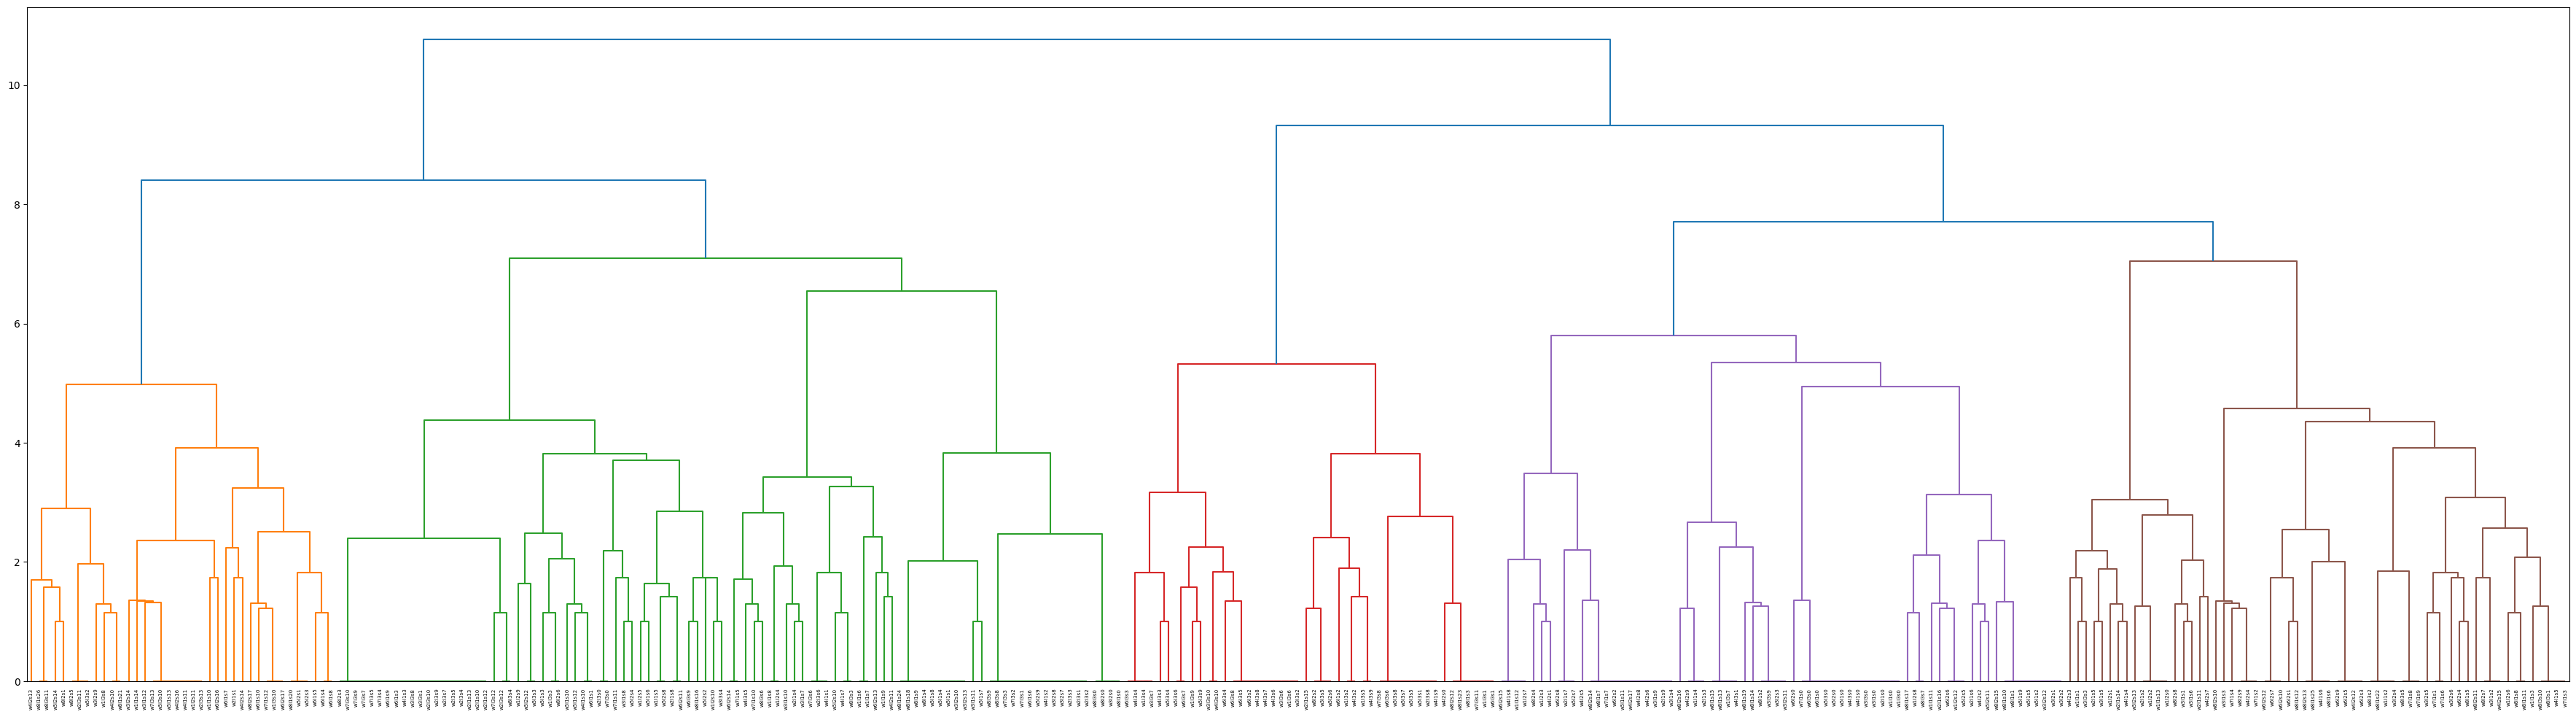

In [4]:
# Make figures nice and big
fig_size = [45,12]
plt.rcParams["figure.figsize"] = fig_size

X = df.drop(columns=["scene_ID", "World", "Level", "Scene"])
hier = linkage(X, method='ward', metric='euclidean') # scipy's hierarchical clustering
res = dendrogram(hier, labels=df['scene_ID'].to_numpy(), get_leaves=True) # Generate a dendrogram from the hierarchy
order = res.get('leaves') # Extract the order on papers from the dendrogram

In [5]:
import numpy as np
import pandas as pd

# Cut the hierarchy and turn the parcellation into a dataframe
part = np.squeeze(cut_tree(hier,n_clusters=n_clusters))

In [6]:
# Create a summary per cluster
X['clusters'] = part
summary_cluster = X.groupby('clusters').mean()
summary_cluster

,Enemy,2-Horde,3-Horde,4-Horde,Roof,Gap,Multiple gaps,Variable gaps,Gap enemy,Pillar gap,...,Stair up,Stair down,Empty stair valley,Enemy stair valley,Gap stair valley,Reward,Moving platform,Flagpole,Beginning,Bonus zone
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.111111,0.388889,0.111111,0.055556,0.222222,0.111111,0.000000,0.055556,0.0,0.00,...,0.055556,0.000000,0.055556,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.055556,0.000000,0.222222,0.000000,0.111111,0.277778,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,1.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.285714,0.0,0.00,...,0.071429,0.000000,0.000000,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.000000
5,0.272727,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.363636,0.181818,0.090909,0.000000,0.000000
6,0.000000,0.400000,0.000000,0.200000,0.000000,0.400000,0.200000,0.000000,0.0,0.00,...,0.200000,0.000000,0.000000,0.000000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000
7,1.000000,0.300000,0.100000,0.000000,0.300000,0.000000,0.000000,0.100000,0.0,0.00,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.083333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,...,1.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.833333,0.083333,0.000000


In [7]:
# Set threshold
threshold = 0.05
for index, row in summary_cluster.iterrows():
    # Filter, sort in descending order
    order = np.argsort(np.array(row))
    row = row.iloc[order]
    print(f'cluster {index}\n')
    print(row[row>0.05])

    

cluster 0

2-Path       0.071429
Beginning    1.000000
Name: 0, dtype: float64
cluster 1

Variable gaps         0.055556
4-Horde               0.055556
Stair up              0.055556
Empty stair valley    0.055556
Moving platform       0.055556
Enemy                 0.111111
Gap                   0.111111
3-Horde               0.111111
Empty valley          0.111111
Enemy valley          0.166667
Roof                  0.222222
2-Horde               0.388889
2-Path                1.000000
Risk/Reward           1.000000
Name: 1, dtype: float64
cluster 2

Enemy valley    0.428571
Empty valley    1.000000
Name: 2, dtype: float64
cluster 3

Empty valley    0.055556
Enemy           0.055556
Roof            0.111111
Pipe valley     0.222222
3-Horde         0.222222
Gap             0.277778
Risk/Reward     0.333333
Enemy valley    1.000000
Name: 3, dtype: float64
cluster 4

Reward           0.071429
3-Horde          0.071429
Stair up         0.071429
Variable gaps    0.285714
Enemy valley     

In [8]:
from src.load_data import load_umap_data

Y = load_umap_data(full_path=True)


✅ Loaded 313 scenes with valid images.


cluster 24

Number of scenes: 13
2-Path          0.384615
Enemy valley    0.461538
Pipe valley     0.923077
Name: 24, dtype: float64


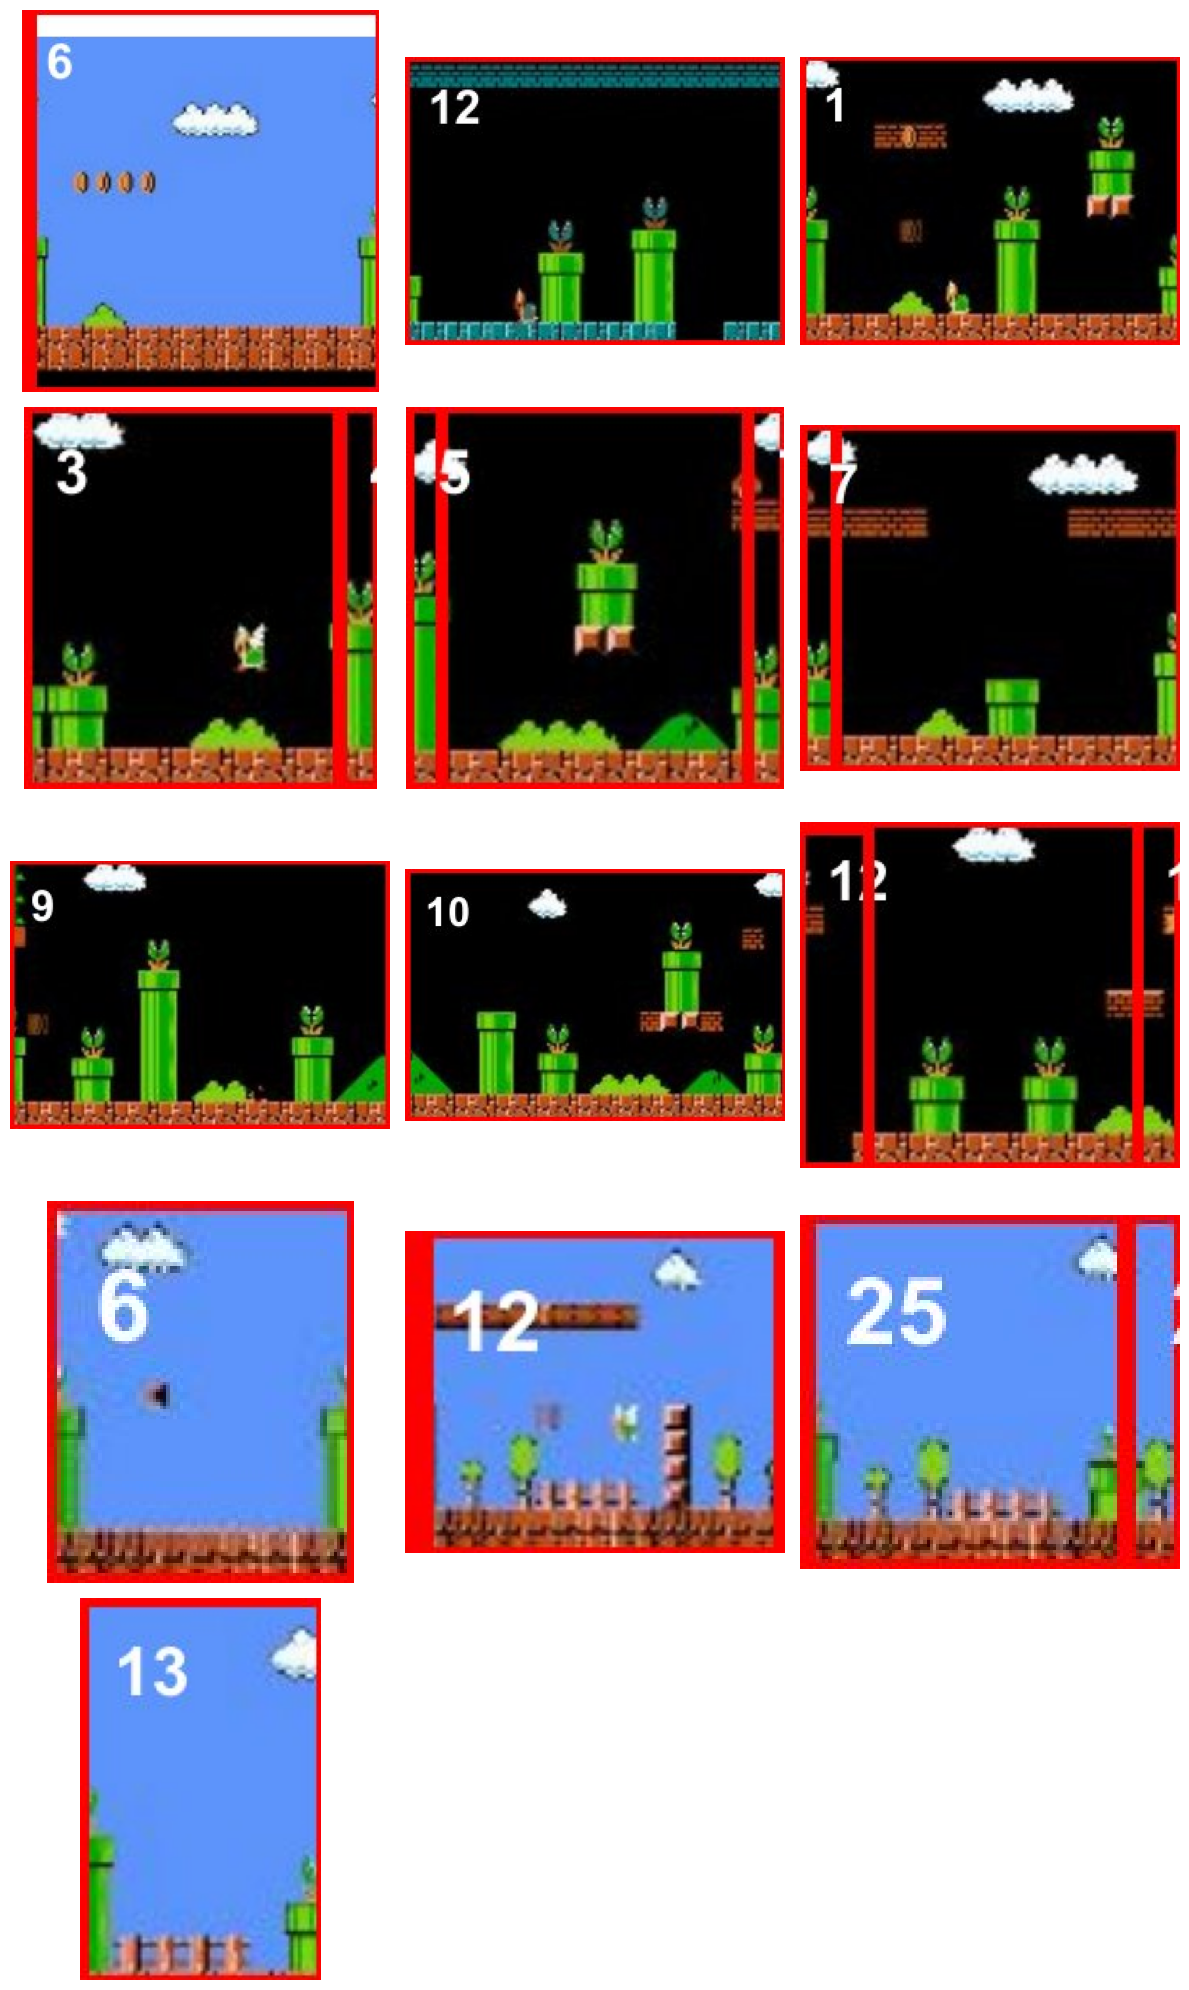

In [9]:
import matplotlib.image as mpimg

ind_cluster  = 24
threshold = 0.05

row = summary_cluster.iloc[ind_cluster]
order = np.argsort(np.array(row))
row = row.iloc[order]
print(f'cluster {ind_cluster}\n')
print(f'Number of scenes: {len(X[X['clusters']==ind_cluster])}')
print(row[row>0.05])

list_file = Y[X['clusters']==ind_cluster]['image_url'].to_list()

# Example: Set your desired number of columns per row
n_cols = 3

# Calculate number of rows needed
n_rows = int(np.ceil(len(list_file) / n_cols))

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through images and plot them
for i, image_path in enumerate(list_file):
    img = mpimg.imread(image_path)  # Load the image
    axes[i].imshow(img)
    axes[i].axis("off")  # Hide axes

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

# Adjust layout and display
plt.tight_layout()
plt.show()
